### *Import Libraries*

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [25]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

In [26]:
warnings.filterwarnings('ignore')

### *Load Dataset*

In [27]:
df = pd.read_csv('Churn_Modelling.csv')

### What is an unbalanced dataset?

It is a database, where the categories of the categorical variables are mutually disproportionate to each other, for example, having 1000 examples for class A, while class B barely has 50 existing examples.

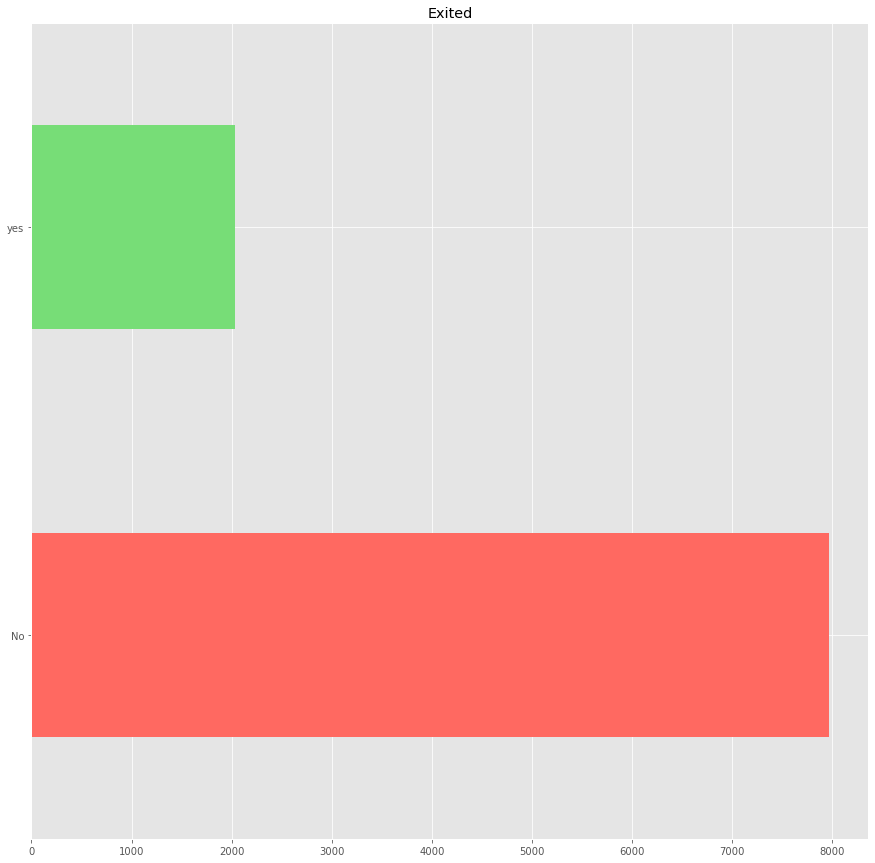

In [28]:
plt.style.use('ggplot')

df.Exited.value_counts() \
.plot(kind = "barh",
      color =  ['#ff6961','#77dd77'],
    title = "Exited",
    figsize = (15,15))
plt.savefig('class_inbalanced.png')

In case we will use a database, to create a classification model, to estimate if the user plans to cancel his bank account. We note that there is a clear unbalanced between two classes, the class that did not unsubscribe is significantly larger than the users who unsubscribed.

In [29]:
df.Exited = df.Exited.apply(lambda x: 1 if x == "yes" else 0)

In [30]:
drops = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=drops)

In [31]:
df = pd.get_dummies(df,prefix=" ",prefix_sep=" ")

In [32]:
X = df.drop(columns=['Exited']).values
y = df.Exited.values

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [34]:
clf = LGBMClassifier(max_depth = 6,
                     random_state=42,
                     n_estimators = 1000,
                     learning_rate = 0.001)

In [35]:
clf.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.001, max_depth=6, n_estimators=1000,
               random_state=42)

In [36]:
print(f'ACC Train: {clf.score(X_train,y_train)}')
print(f'ACC Test: {clf.score(X_test,y_test)}')

ACC Train: 0.854875
ACC Test: 0.854


The model will generate good precision for the training and validation data, at first glance the model works decently.

### *Is it important to treat the imbalance between classes?*
By the nature of Machine Learning models, they assume that we provide data in a uniform manner. When presented with an unbalanced data set, the algorithm will have a prediction preference for the majority class, while for the minority class it will misclassify them, because there is not that much data, so that it can learn patterns that help in the prediction.

In [37]:
def cm_plot(cm):
    
    fig,ax = plt.subplots(1,1,figsize = (15,5))
    ax.set_title('Confussion Matrix')
    sns.heatmap(cm,annot=True,fmt=".1f",ax = ax,cmap="crest")

In [38]:
pred = clf.predict(X_test)
cm = confusion_matrix(y_test,pred)

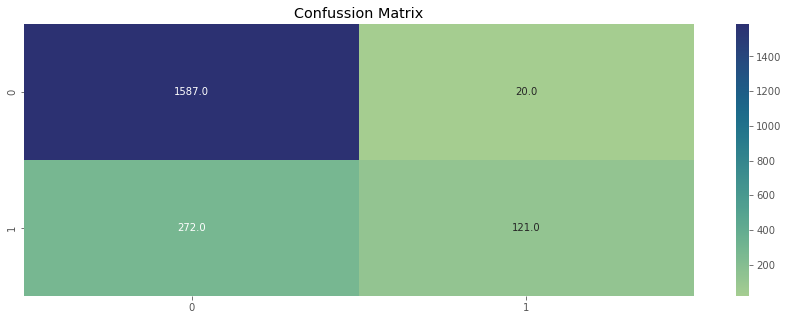

In [39]:
cm_plot(cm)
plt.savefig('confusion_matrix_inbalaced.png')

The model misclassifies the category that is in the minority, since it does not have enough training data.

### *Class Weight*

There are models such as the case of the Ensemble algorithm and the Logistic Regression, which have an interesting class_weight parameter, which automatically serves to adjust the weights in an inversely proportionate way to the frequencies of the input classes.

In [40]:
clf = LGBMClassifier(max_depth = 6,
                     random_state=42,
                     n_estimators = 1000,
                     learning_rate = 0.001,
                    class_weight = "balanced")

In [41]:
clf.fit(X_train,y_train)

LGBMClassifier(class_weight='balanced', learning_rate=0.001, max_depth=6,
               n_estimators=1000, random_state=42)

In [42]:
pred = clf.predict(X_test)
cm = confusion_matrix(y_test,pred)

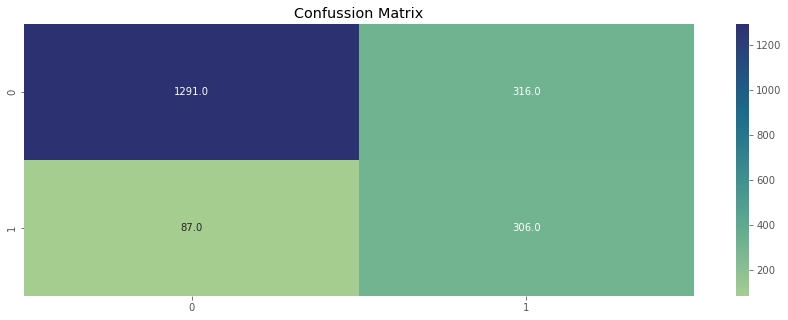

In [43]:
cm_plot(cm)
plt.savefig('confusion_matrix_balanced.png')

A better number of hits is observed, compared to the minority class, thanks to the adjustment of hyper-parameters that we carried out.

### *SMOTE*

The SMOTE function also serves to balance the data, it consists of adding more new data to the categories that are less present in the dataset, it takes similar characteristics of the data to create them.

In [46]:
smote = SMOTE(random_state=42)

X_train_balanced,y_train_balanced = smote.fit_resample(X_train,y_train)
X_test_balanced,y_test_balanced = smote.fit_resample(X_test,y_test)

In [49]:
np.unique(y_train_balanced,return_counts=True)

(array([0, 1], dtype=int64), array([6356, 6356], dtype=int64))

In [50]:
clf = LGBMClassifier(max_depth = 6,
                     random_state=42,
                     n_estimators = 1000,
                     learning_rate = 0.001)

In [55]:
clf.fit(X_train_balanced,y_train_balanced)

LGBMClassifier(learning_rate=0.001, max_depth=6, n_estimators=1000,
               random_state=42)

In [56]:
print(f'ACC Train: {clf.score(X_train_balanced,y_train_balanced)}')
print(f'ACC Test: {clf.score(X_test_balanced,y_test_balanced)}')

ACC Train: 0.8903398363750786
ACC Test: 0.8855009334163036


In [59]:
pred = clf.predict(X_test_balanced)
cm = confusion_matrix(y_test_balanced,pred)

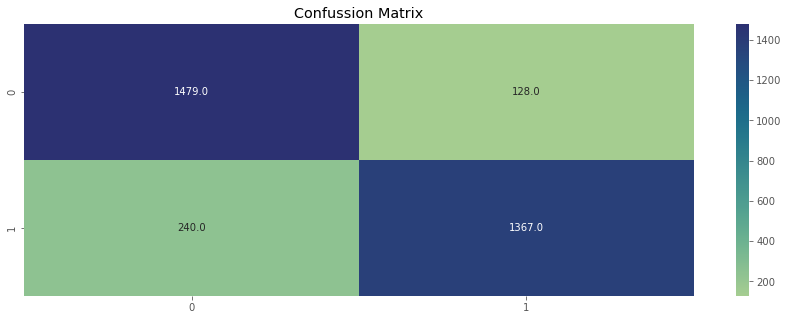

In [60]:
cm_plot(cm)
plt.savefig('confusion_matrix_smote.png')

By applying a correct balance of the data, we managed to significantly increase the performance of our model.